## Librerías

In [81]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Datos

In [82]:
df=pd.read_csv('https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv')

In [83]:
target='species'

# Primera Exploración

In [84]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [86]:
df.set_index('rowid',inplace=True)

In [87]:
df.describe(include='all' ).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,344,3,Adelie,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,344,3,Biscoe,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bill_length_mm,342.0,NaN,NaN,NaN,43.92193,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,NaN,NaN,NaN,17.15117,1.974793,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,342.0,NaN,NaN,NaN,200.915205,14.061714,172.0,190.0,197.0,213.0,231.0
body_mass_g,342.0,NaN,NaN,NaN,4201.754386,801.954536,2700.0,3550.0,4050.0,4750.0,6300.0
sex,333,2,male,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,344.0,NaN,NaN,NaN,2008.02907,0.818356,2007.0,2007.0,2008.0,2009.0,2009.0


In [88]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [89]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [90]:
df[df.duplicated()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,


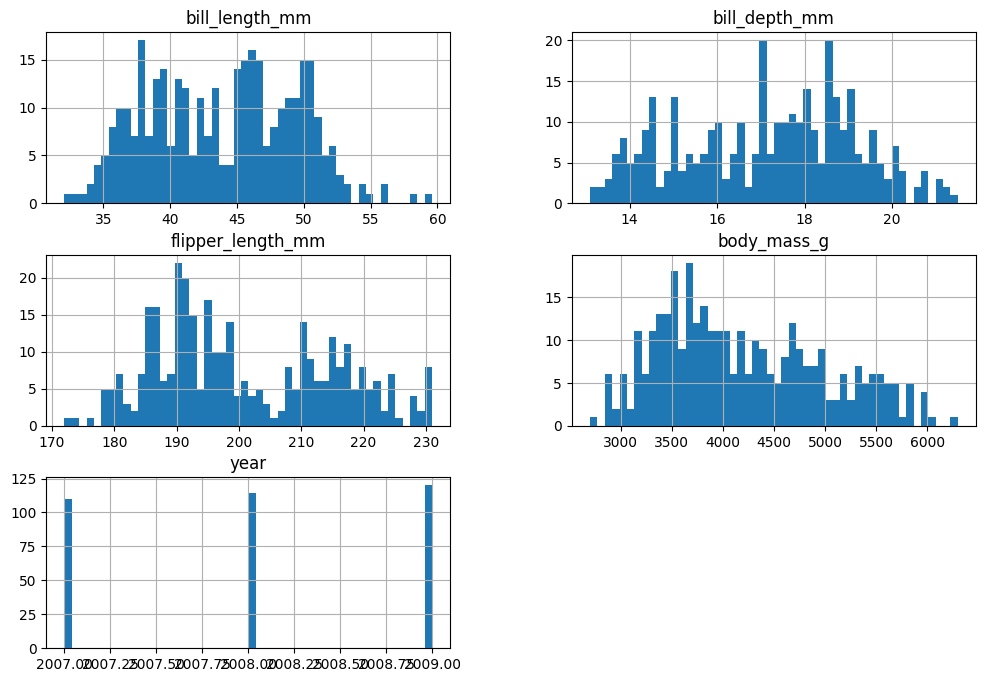

In [91]:
df.hist(bins=50, figsize=(12,8))
plt.show()

# Mini EDA

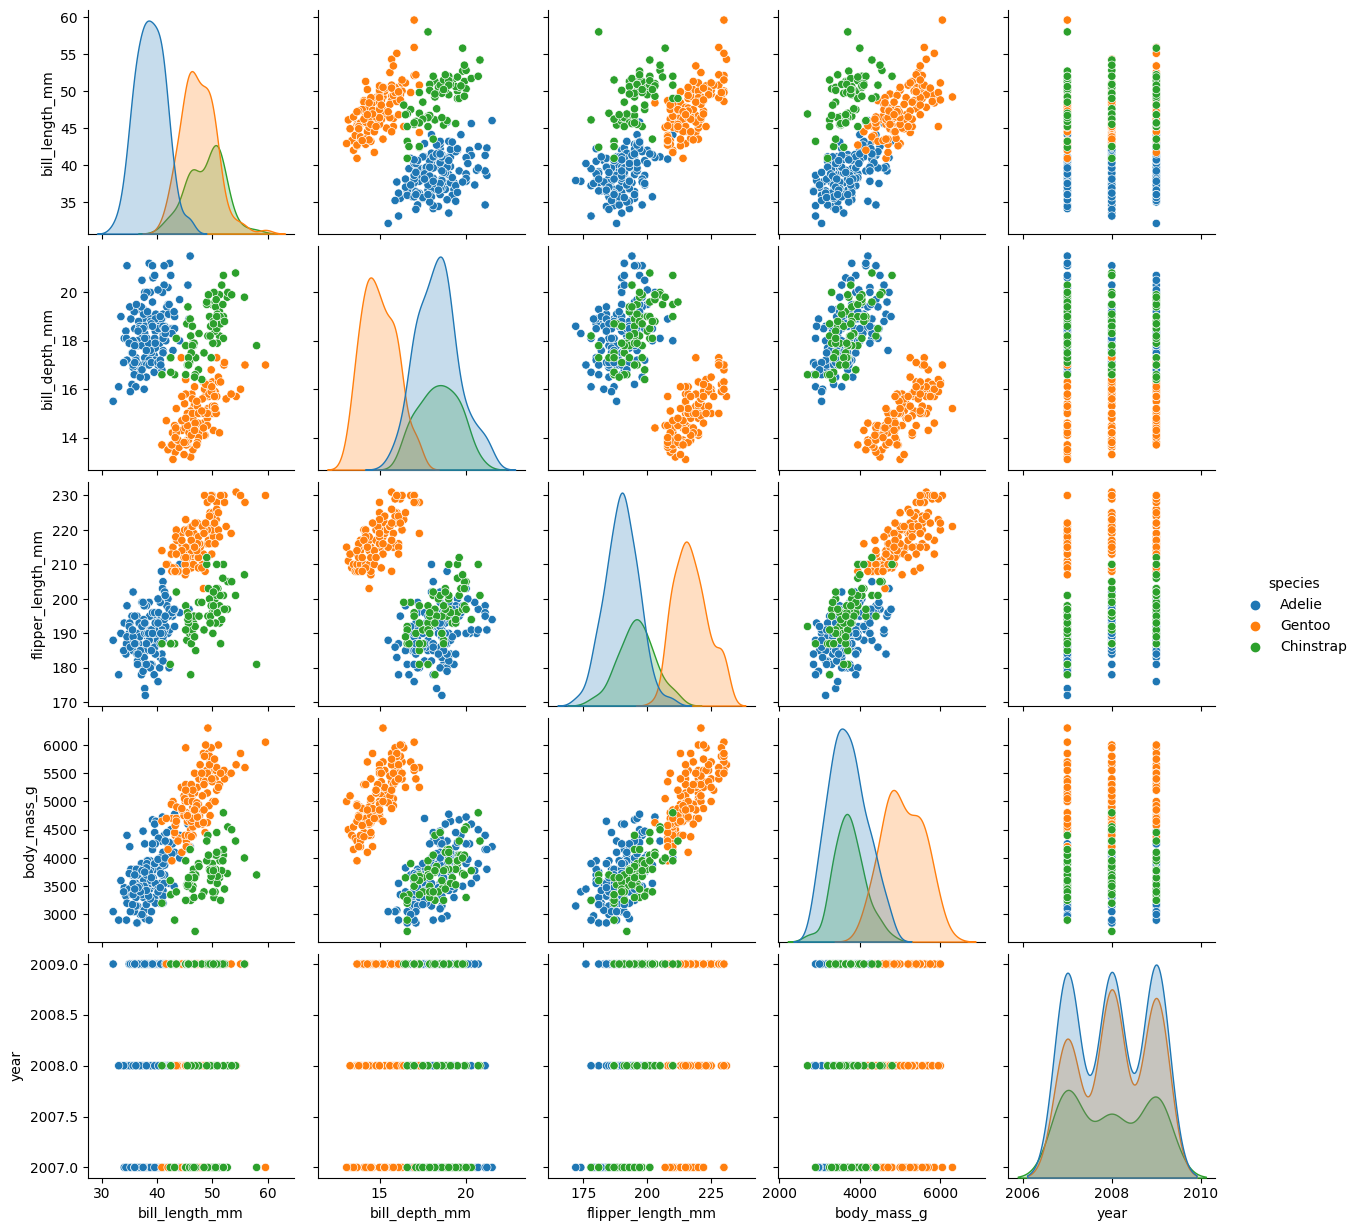

In [92]:
sns.pairplot(df,hue='species')

In [93]:
penguins_corr=df.dropna().corr()

C:\Users\0205301\AppData\Local\Temp\ipykernel_46032\4237193145.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins_corr=df.dropna().corr()


In [94]:
penguins_corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


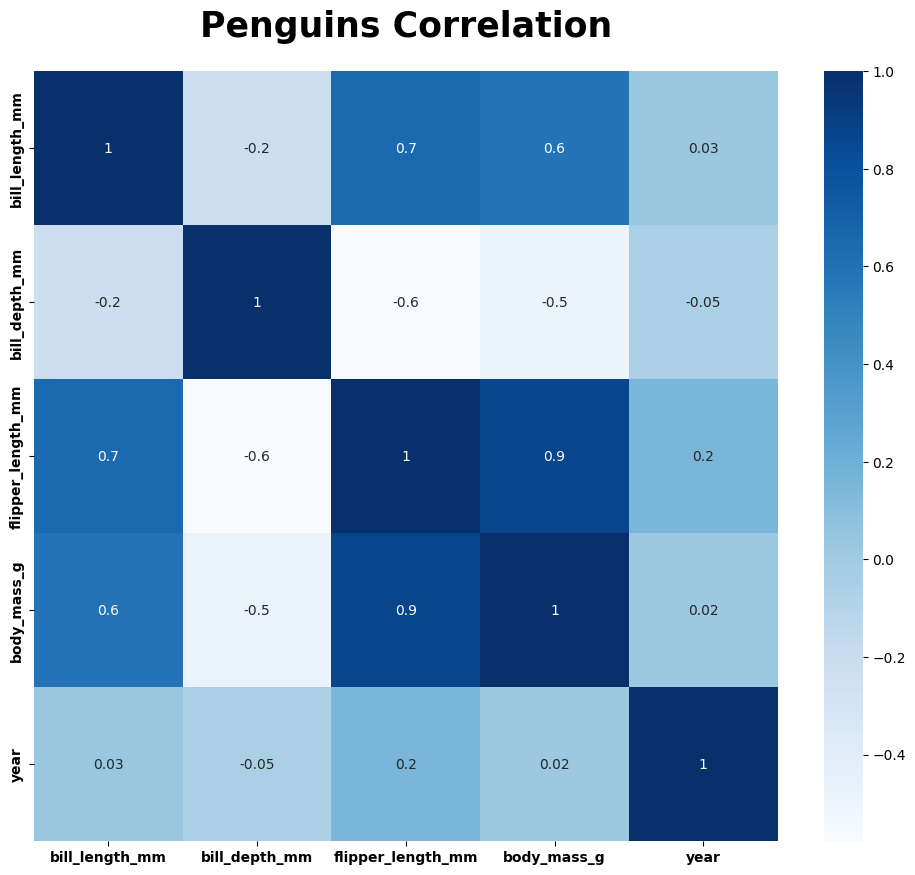

In [95]:
plt.figure(figsize=(12, 10))
sns.heatmap(penguins_corr, fmt=".1g", annot=True, cmap="Blues")
plt.title("Penguins Correlation", weight="bold", fontsize=25, pad=25)
plt.xticks(weight="semibold", fontsize=10)
plt.yticks(weight="semibold", fontsize=10);

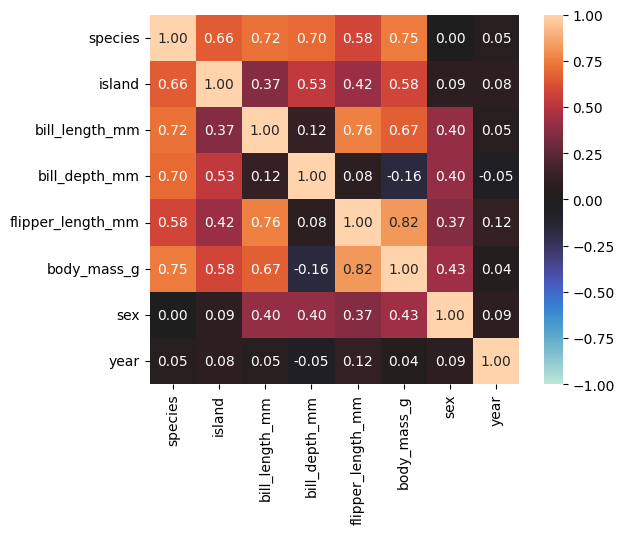

In [96]:
import dython
dfcorr=dython.nominal.associations(df, nominal_columns=['species', 'island', 'sex'])['corr']

In [97]:
dfcorr[dfcorr>.65]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
species,1.000000,0.657329,0.721939,0.697617,NaN,0.749210,NaN,NaN
island,0.657329,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
bill_length_mm,0.721939,NaN,1.000000,NaN,0.763654,0.665226,NaN,NaN
bill_depth_mm,0.697617,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
flipper_length_mm,NaN,NaN,0.763654,NaN,1.000000,0.820371,NaN,NaN
body_mass_g,0.749210,NaN,0.665226,NaN,0.820371,1.000000,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# Tratamiento de Valores Atípicos y Missing

In [98]:
df[df['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009


In [99]:
df.groupby(['species', 'sex'])[['sex']].count()

sex
species   sex        
Adelie    female   73
          male     73
Chinstrap female   34
          male     34
Gentoo    female   58
          male     61

In [ ]:
df.isna().sum()

In [64]:
sex_map = {'male': 0,
           'female': 1}
sex_map

{'male': 0, 'female': 1}

In [65]:
df2 = df.copy()
df2['Sex'] = df2['sex'].map(sex_map)
df2.drop(columns=['species', 'island', 'sex'], inplace=True)
df_array_imp = np.array(df2)

In [72]:
from sklearn.preprocessing import MinMaxScaler
preprocess = MinMaxScaler()
array_norm = preprocess.fit_transform(df2) 
array_norm

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667, 0.        ,
        0.        ],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556, 0.        ,
        1.        ],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778, 0.        ,
        1.        ],
       ...,
       [0.63636364, 0.60714286, 0.3559322 , 0.29861111, 1.        ,
        0.        ],
       [0.68      , 0.70238095, 0.6440678 , 0.38888889, 1.        ,
        0.        ],
       [0.65818182, 0.66666667, 0.44067797, 0.29861111, 1.        ,
        1.        ]])

In [73]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
df_array_imp= imputer.fit_transform(df2)

In [76]:
df_imputed = pd.DataFrame(df_array_imp, columns=df2.columns)

In [79]:
df['sex'] = df_imputed['Sex'].astype(int)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1.0,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,1.0,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0,2007


In [80]:
# no more missing values!
df.isna().sum()

species              0
island               0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  1
year                 0
dtype: int64

In [ ]:
# map back to string format for more visuals
sex_map = {0: 'male',
           1: 'female'}
df['sex'] = df['sex'].map(sex_map)

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


**Let's look for other patterns in the data**

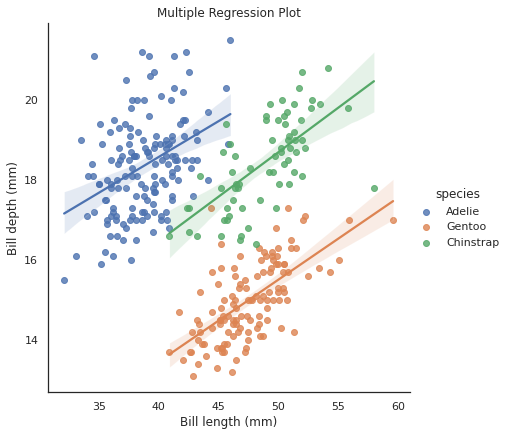

In [ ]:
# Regression plot
g = sns.lmplot(data=df,
               x='bill_length_mm', y = 'bill_depth_mm', 
               hue = 'species', height=6)
g.set_axis_labels('Bill length (mm)', 'Bill depth (mm)')
g.set(title = "Multiple Regression Plot")

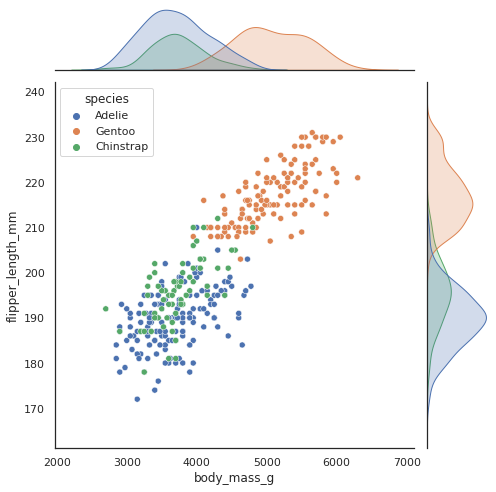

In [ ]:
# scatterplot with distributions by colored by species
g = sns.jointplot(x= 'body_mass_g', y = 'flipper_length_mm',
                  data = df, 
                  color = 'm', height = 7, hue = 'species')

- As we saw earlier in the descriptive statistics, Body Mass and Flipper length have the strongest positive correlation among feature; that is easily seen in the plot above.

- Its also worth noting the **nice seperation in flipper length distributions between Adelie and Gentoo** species; this will be a *good feature for training*.

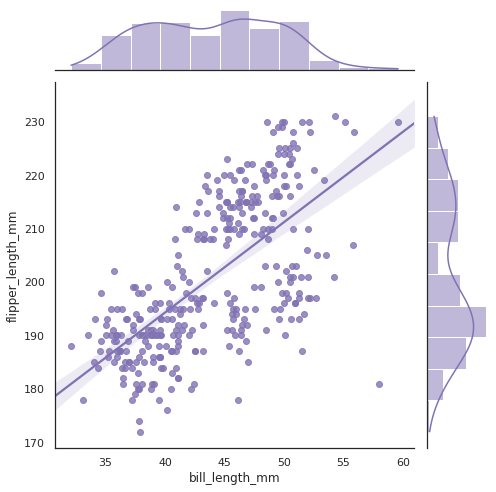

In [ ]:
# regression plot
g = sns.jointplot(x= 'bill_length_mm', y = 'flipper_length_mm',
                  data = df, kind = 'reg', truncate = False,
                  color = 'm', height = 7)

[Text(0, 0.5, '')]

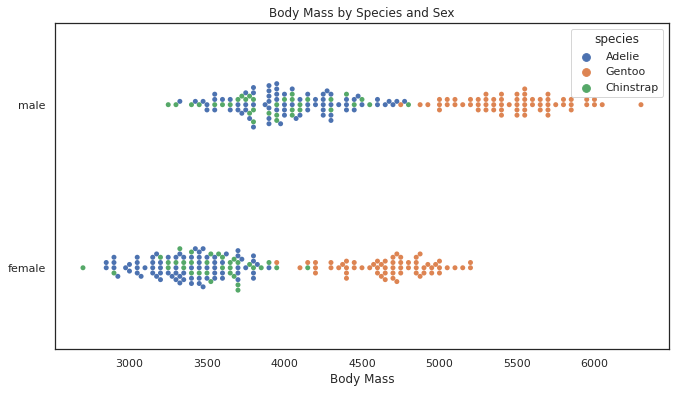

In [ ]:
# swarm plot can be used in place of a violin plot to show each observation
ax = plt.figure(figsize=(11,6))
ax = sns.swarmplot(data=df, x = 'body_mass_g', y = 'sex', hue = 'species')
ax.set(xlabel='Body Mass')
ax.set(title = 'Body Mass by Species and Sex')
ax.set(ylabel='')

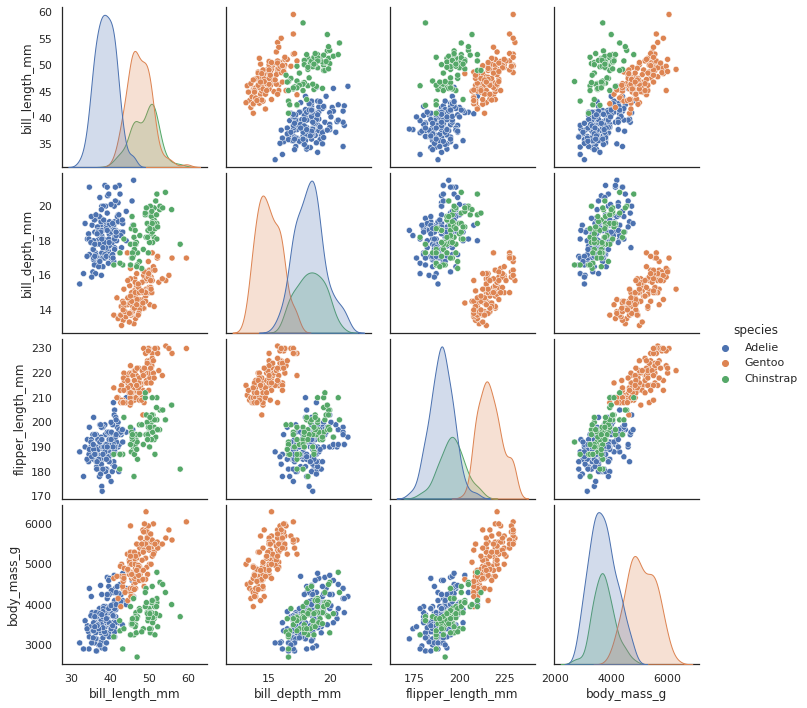

In [ ]:
# pairs of scatterplots and distributions
sns.set_theme(style='white')
sns.pairplot(df, hue='species')

# División de Datos

# Escalado

# Baseline

# Validar modelo